### Importing important Libraries

In [1]:
%matplotlib inline
import pandas as pd # pandas is a dataframe library
import numpy as np
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

## Phase 1 -  Data Exploration
### Loading and Reviewing the Data

In [2]:
#Reading the dataset and displaying columun unit
diabetes = pd.read_csv('C:/Users/HP/Desktop/Lab/datasets/diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
#displaying top 5 observation unit
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Features data-type
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Statistical summary
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Data Visualization

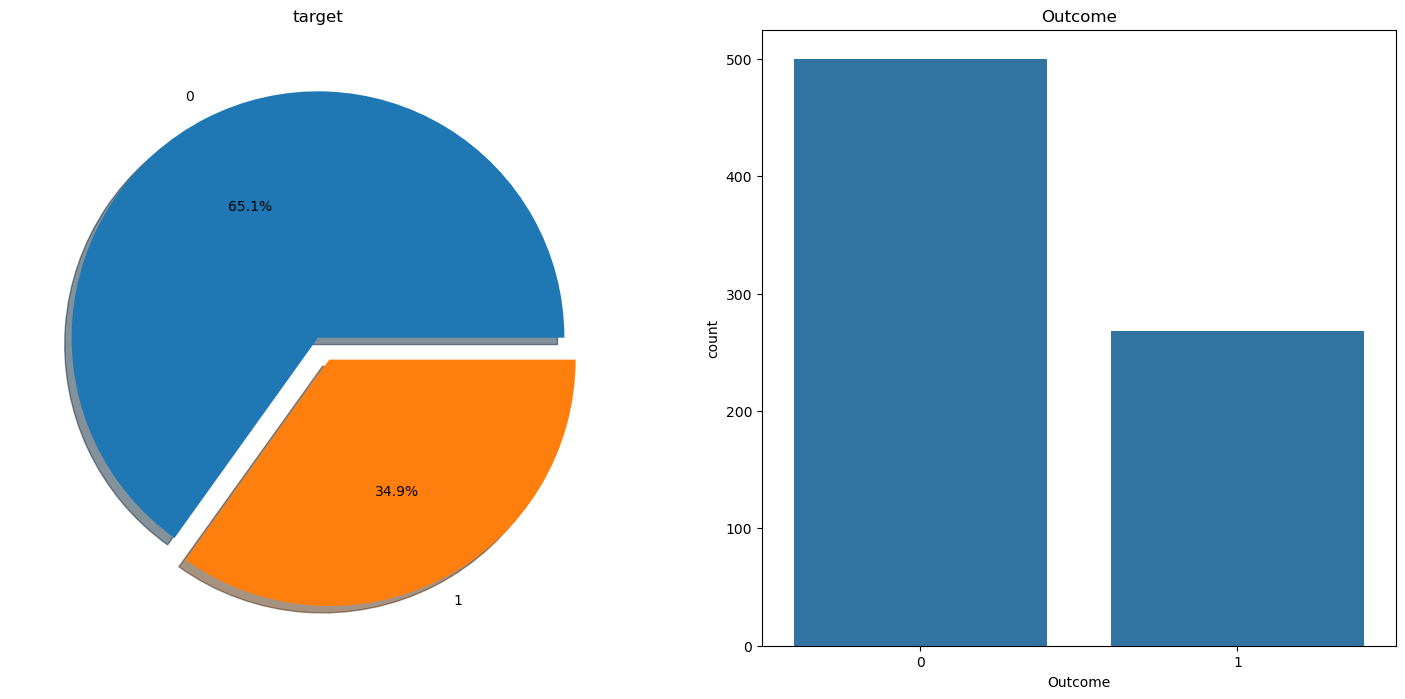

In [7]:
# The distribution of the outcome variable in the data was examined and visualized.
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
diabetes['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data = diabetes,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

### Correlated Feature Check

In [8]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [9]:
diabetes["Outcome"].value_counts()*100/len(diabetes)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [10]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

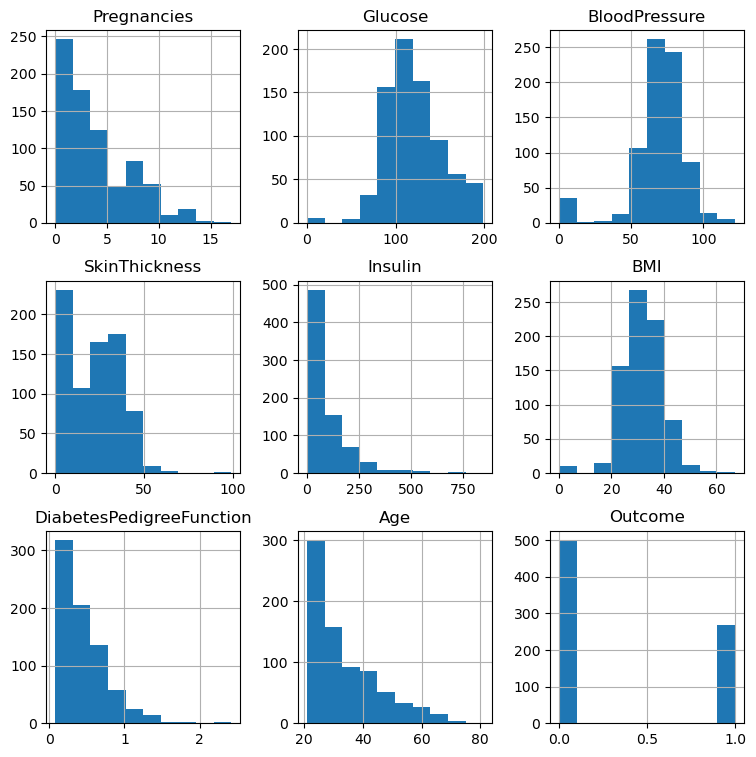

In [11]:
diabetes.hist(figsize=(9, 9))

Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

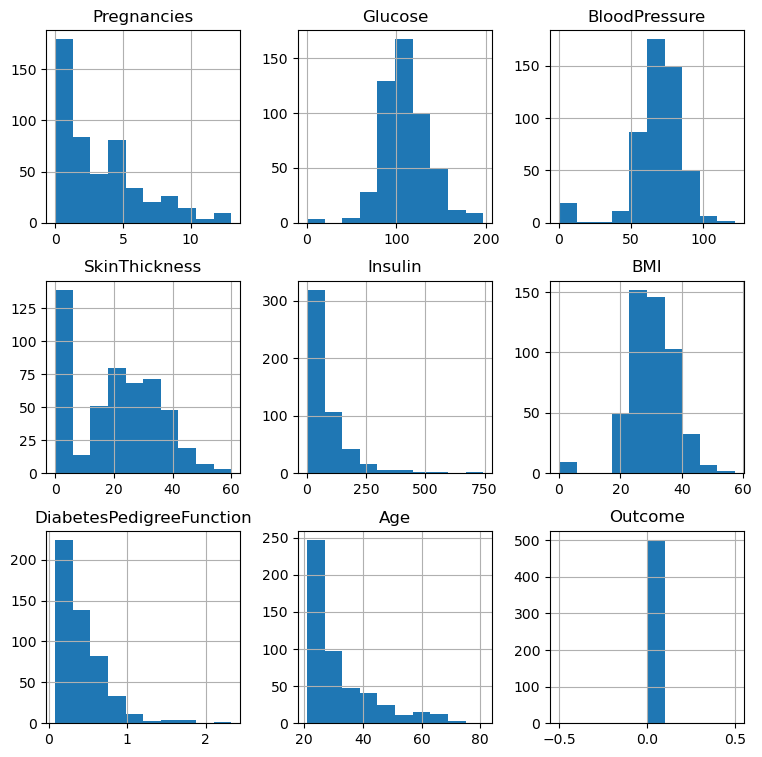

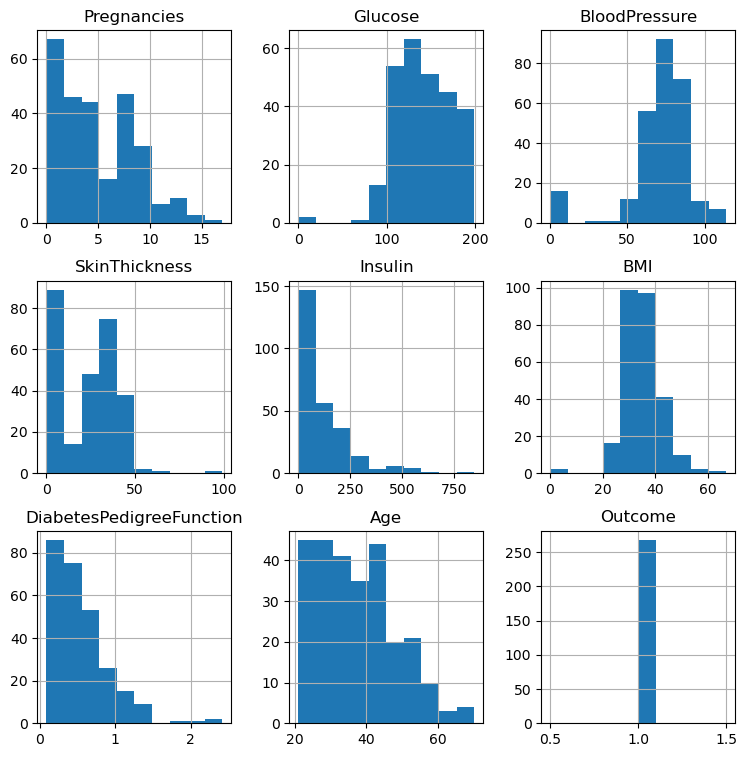

In [12]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

<Axes: >

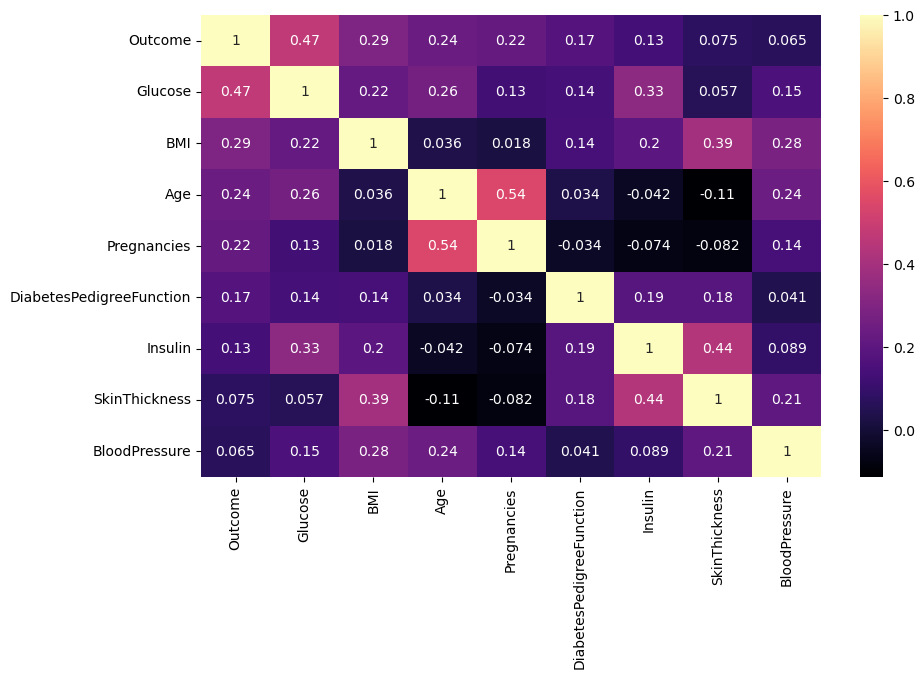

In [13]:
#Correlation Matrix
k = 9
cols = diabetes.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = diabetes[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'magma')

In [14]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Phase 2 - Data Cleaning

### Missing or Null Data points

In [15]:
#diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [16]:
#MISSING VALUE ANALYSIS FOR DATA PREPROCESSING
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = diabetes[diabetes[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [19]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = diabetes.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes[i].isnull()), i] = median_target(i)[i][0]
    diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes[i].isnull()), i] = median_target(i)[i][1]

### Unexpected Outliers

In [20]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [21]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [22]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [23]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [24]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [25]:
# Missing values were filled.
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


## Phase 3 - Feature Selection

In [27]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

## Phase 4 - Model Selection

In [28]:
# Initial model selection process
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('NN', MLPClassifier()))

### Data Spliting

In [29]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [30]:
print("{0:0.2f}% in training set".format((len(X_train)/len(diabetes.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(diabetes.index)) * 100))

70.70% in training set
23.57% in test set


In [31]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (543, 8)
X_test shape: (181, 8)
Y_train shape: (543,)
Y_test shape: (181,)


### Training Algorithm - Logistic Regression Algorithm

In [32]:
# 4: Data Modelling
logreg = LogisticRegression(solver='lbfgs', max_iter=4000,random_state = 42)
logreg.fit(X_train, y_train)
print(logreg)



LogisticRegression(max_iter=4000, random_state=42)


### Training Algorithm - K nearest neighbors Algorithm

In [33]:

knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
print(knn.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=24)


### Training  Algorithm - Support Vector Machine

In [34]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)
svc

SVC(kernel='linear', random_state=42)

### Training  Algorithm - Naive Bayes

In [35]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb

GaussianNB()

In [36]:
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)
dectree

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Training  Algorithm - Artificial Neural Network

In [37]:
ann = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)

ann.fit(X_train, y_train.ravel());
ann

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=12, max_iter=5000,
              random_state=2)

In [38]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scale=scale.fit_transform(X_train)
x_test_scale=scale.fit_transform(X_test)

mlp=MLPClassifier(random_state=0)

mlp.fit(x_train_scale, y_train)

print(mlp.score(x_train_scale, y_train))
print(mlp.score(x_test_scale, y_test))

0.8324125230202578
0.8011049723756906


C:\Users\HP\.conda\envs\DeepLearning_Env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Training Algorithm - Random Forest Classifier

In [39]:
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)
ranfor


RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

### Training Algorithm - Gradient Boosting Classifier

In [40]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb

GradientBoostingClassifier()

# Diabets predictions on train dataset

In [41]:
logreg_predict_train = logreg.predict(X_train)
gb_predict_train=gb.predict(X_train)
knn_pred_train = knn.predict(X_train)
svc_pred_train = svc.predict(X_train)
dectree_pred_train = dectree.predict(X_train)
ranfor_pred_train = ranfor.predict(X_train)
nb_predict_train = nb.predict(X_train)
ann_predict_train = ann.predict(X_train)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_train, logreg_predict_train)
accuracy_gb=accuracy_score(y_train, gb_predict_train)
accuracy_knn = accuracy_score(y_train, knn_pred_train)
accuracy_svc = accuracy_score(y_train,svc_pred_train)
accuracy_nb = accuracy_score(y_train, nb_predict_train)
accuracy_dectree = accuracy_score(y_train, dectree_pred_train)
accuracy_ann = accuracy_score(y_train, ann_predict_train)
accuracy_ranfor = accuracy_score(y_train, ranfor_pred_train)

# Accuracy on train set

In [43]:

print("Logistic Regression: " + str(accuracy_logreg * 100))
print("GradientBoosting: " + str(accuracy_gb * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))

print("Decision tree: " + str(accuracy_dectree * 100))
print("Artificial Neural Network: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 76.97974217311234
GradientBoosting: 91.52854511970534
K Nearest neighbors: 75.50644567219152
Support Vector Classifier: 76.97974217311234
Naive Bayes: 76.61141804788214
Decision tree: 100.0
Artificial Neural Network: 100.0
Random Forest: 98.89502762430939


# Diabetes predictions on test dataset

In [44]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_gb = gb.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_pred_ann = ann.predict(X_test)

# Model Evaluation

In [45]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_gb = accuracy_score(y_test, Y_pred_gb)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ann = accuracy_score(y_test, Y_pred_ann)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

# Accuracy on test set 

In [46]:

print("Logistic Regression: " + str(accuracy_logreg * 100))
print("GradientBoosting: " + str(accuracy_gb * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Artificial Neural Network: " + str(accuracy_ann * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))


Logistic Regression: 77.90055248618785
GradientBoosting: 77.34806629834254
K Nearest neighbors: 73.48066298342542
Support Vector Classifier: 76.79558011049724
Naive Bayes: 73.48066298342542
Decision tree: 67.95580110497238
Artificial Neural Network: 69.06077348066299
Random Forest: 77.34806629834254


### Using K-Fold cross validation

In [47]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=None)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

print(kf_cross_val)



  Name     Score
0  KNN  0.714136
1  SVC  0.755651
2   LR  0.772165
3   DT  0.692142
4  GNB  0.754205
5   RF  0.770833
6   GB  0.759798
7   NN  0.683771


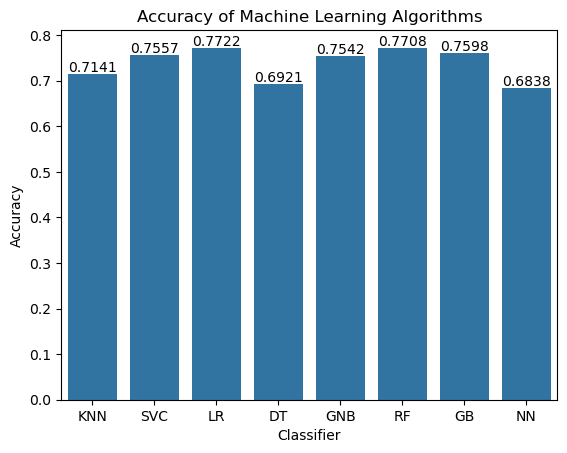

In [48]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
plt.title('Accuracy of Machine Learning Algorithms')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()